### Q1 (pre-lec

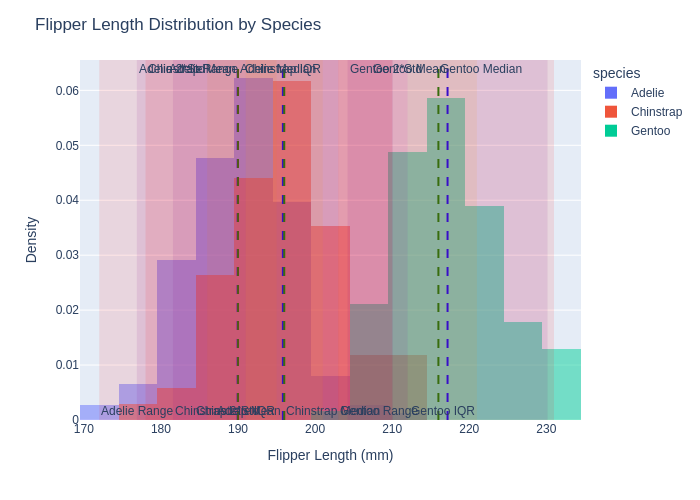

In [23]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Create a histogram for each species
fig = px.histogram(penguins, x="flipper_length_mm", color="species", barmode="overlay", histnorm='probability density')

# Calculate statistics for each species
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', median='median', min='min', max='max', std='std', q1=lambda x: x.quantile(0.25), q3=lambda x: x.quantile(0.75)
).reset_index()

for i, row in species_stats.iterrows():
    species = row['species']
    mean = row['mean']
    median = row['median']
    min_val = row['min']
    max_val = row['max']
    std = row['std']
    q1 = row['q1']
    q3 = row['q3']
    
    # Adjust annotation positions to avoid overlap
    mean_annotation_position = 'top left' if i % 2 == 0 else 'bottom left'
    median_annotation_position = 'top right' if i % 2 == 0 else 'bottom right'
    range_annotation_position = 'top left' if i % 2 != 0 else 'bottom left'
    iqr_annotation_position = 'top right' if i % 2 != 0 else 'bottom right'
    std_annotation_position = 'top left' if i % 2 == 0 else 'bottom left'
    
    # Add lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f'{species} Mean', annotation_position=mean_annotation_position)
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text=f'{species} Median', annotation_position=median_annotation_position)
    
    # Add rectangles for range, IQR, and 2*std
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='red', opacity=0.1, line_width=0, annotation_text=f'{species} Range', annotation_position=range_annotation_position)
    fig.add_vrect(x0=q1, x1=q3, fillcolor='orange', opacity=0.1, line_width=0, annotation_text=f'{species} IQR', annotation_position=iqr_annotation_position)
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, fillcolor='purple', opacity=0.1, line_width=0, annotation_text=f'{species} 2*Std', annotation_position=std_annotation_position)

fig.update_layout(title='Flipper Length Distribution by Species', xaxis_title='Flipper Length (mm)', yaxis_title='Density')
fig.show(renderer="png")


### Q2

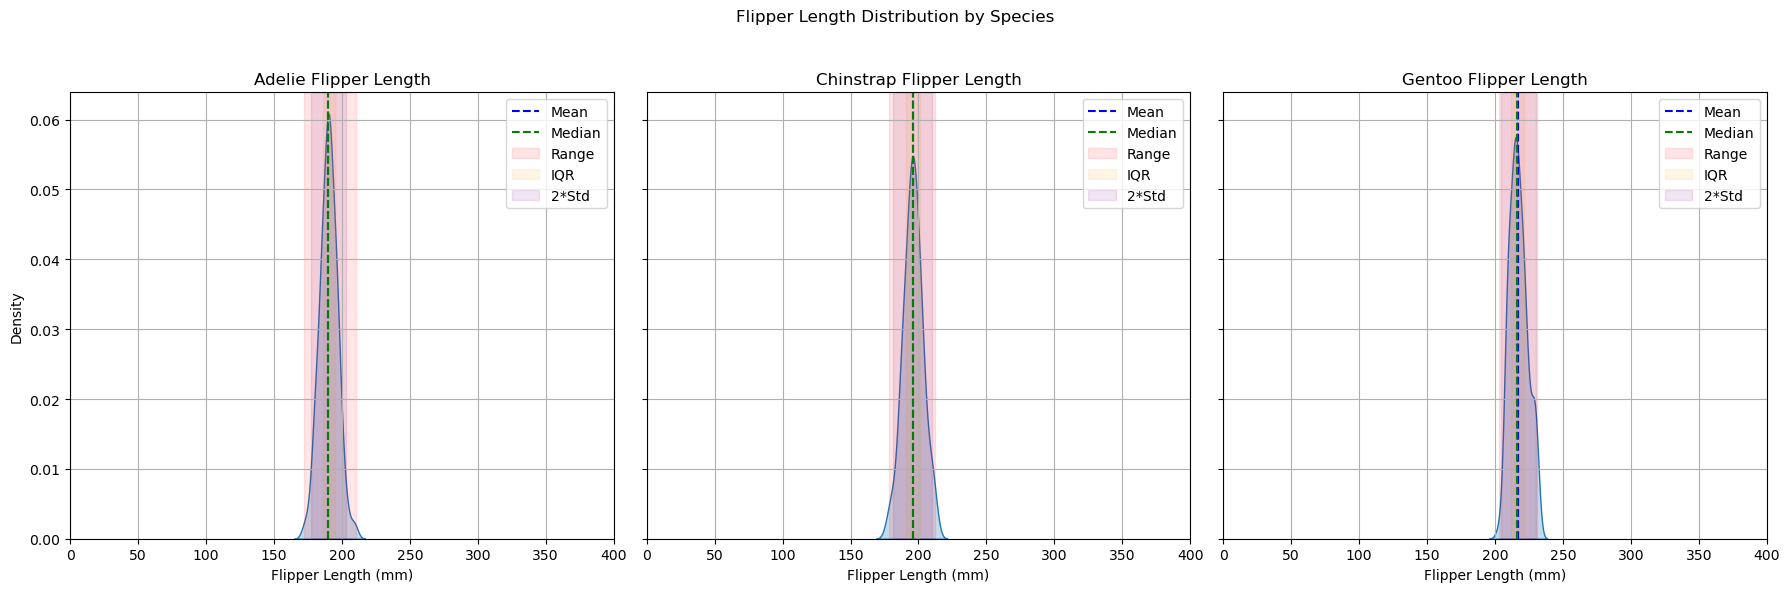

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins").dropna(subset=['flipper_length_mm'])

# Calculate statistics for each species
species_stats = penguins.groupby('species')['flipper_length_mm'].agg(
    mean='mean', median='median', min='min', max='max', std='std',
    q1=lambda x: x.quantile(0.25), q3=lambda x: x.quantile(0.75)
).reset_index()

# Create a figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot KDE for each species
for ax, (species, group) in zip(axes, penguins.groupby('species')):
    sns.kdeplot(data=group, x='flipper_length_mm', ax=ax, fill=True)
    stats = species_stats[species_stats['species'] == species].iloc[0]  # Fixed line
    
    # Add lines for mean and median
    ax.axvline(stats['mean'], color='blue', linestyle='--', label='Mean')
    ax.axvline(stats['median'], color='green', linestyle='--', label='Median')
    
    # Add rectangles for range, IQR, and 2*std
    ax.axvspan(stats['min'], stats['max'], color='red', alpha=0.1, label='Range')
    ax.axvspan(stats['q1'], stats['q3'], color='orange', alpha=0.1, label='IQR')
    ax.axvspan(stats['mean'] - 2*stats['std'], stats['mean'] + 2*stats['std'], color='purple', alpha=0.1, label='2*Std')
    
    ax.set_xlim(0, 400)  # Set x-axis range
    ax.set_title(f'{species} Flipper Length')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')  # Added y-axis label
    ax.legend()
    ax.grid(True)  # Added grid for better readability

fig.suptitle('Flipper Length Distribution by Species')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Q3

Sure! Here's a summary of our chat session:

1. **Visualizing Data Distributions**:
   - We discussed three methods: **Box Plot**, **Histogram**, and **Kernel Density Estimator (KDE)**.
   - **Box Plot**: Summarizes data with key statistics like median, quartiles, and outliers.
   - **Histogram**: Shows the frequency of data points within bins, useful for comparing amounts.
   - **KDE**: Provides a smooth, continuous estimate of the data's density but doesn't show exact counts.

2. **Practicality**:
   - You noted that KDEs are less practical for showing the exact amount of data, which is a valid point.
   - Each method has its strengths and limitations depending on the analysis needs.



### Q4

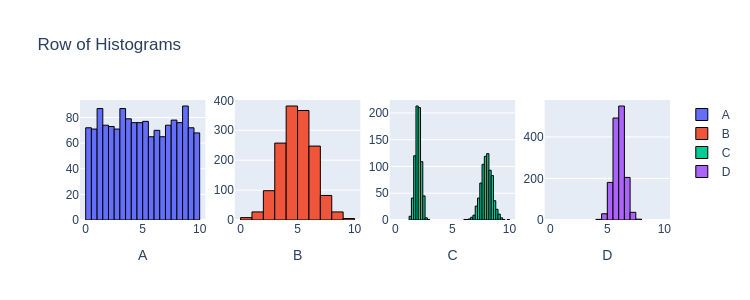

In [12]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. dataset C and D have similar means and similar variances.
2. dataset B and D have similar means but quite different variance.
3. dataset B and D have similar variance but quite differernt means.
4. dataset A, B and  C have quite different means and quite different variances.

### Q5

Summary:

Right-skewed: 
Mean > Median

Left-skewed: 
Mean < Median


Understanding this relationship helps in interpreting data distributions and making informed decisions based on the nature of the data.

#### to explain the code:

Right-Skewed Data (sample1): The code generates right-skewed data, creates a histogram, and calculates the mean and median.


Left-Skewed Data (sample2): The code generates left-skewed data by negating the values from a Gamma distribution.

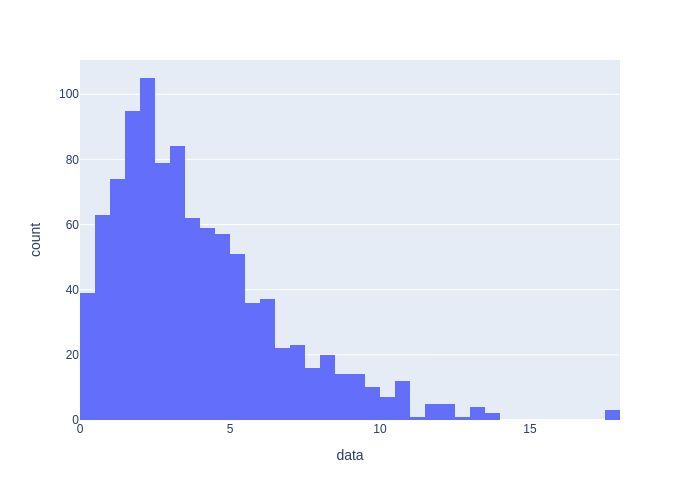

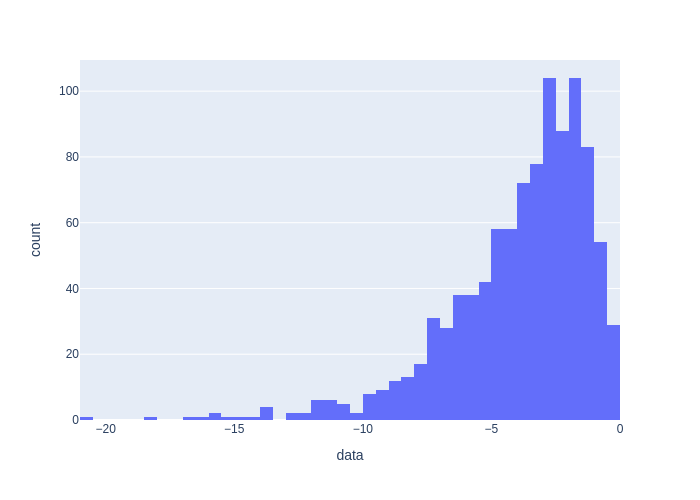

Right-skewed data: Mean = 3.9327307919808754, Median = [3.24984612]
Left-skewed data: Mean = -3.9240195627760093, Median = [-3.27353001]


In [17]:
import plotly.express as px

# Right-skewed data
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")

# Left-skewed data
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

# Mean and Median
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])

print(f"Right-skewed data: Mean = {mean1}, Median = {median1}")
print(f"Left-skewed data: Mean = {mean2}, Median = {median2}")


mean: the average.

median: the middle value.

right/left skewed: the sorting of spcific side of the data, which is divided into two groups by the median and mean value.

### Q6

Pokémon Dataset

In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Display summary statistics
print(df.describe())

       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.00000           0.035274     0.000000   
25%      1000.000000   106.000000  187.25000           5.200000   150.000000   
50%      2000.000000   111.000000  374.50000          10.158912   260.000000   
75%      3000.000000   123.000000  561.75000          16.000000   410.000000   
max      3000.000000   130.000000  749.00000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         637.000000   
mean          127.096154                  21.815385           3.409105   
std           127.875914                  21.885199      

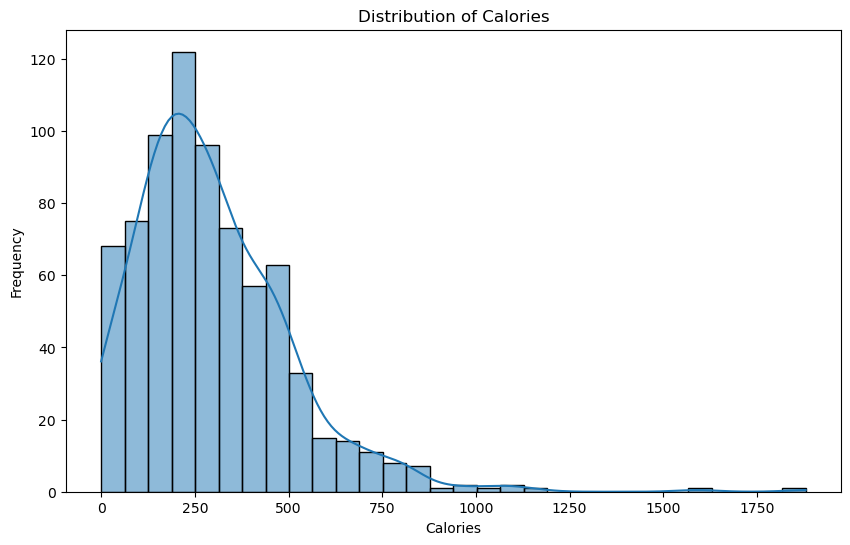

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the 'calories' column
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], bins=30, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

### Q7

In [14]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[200,70000], range_y=[25,90])

### Q8

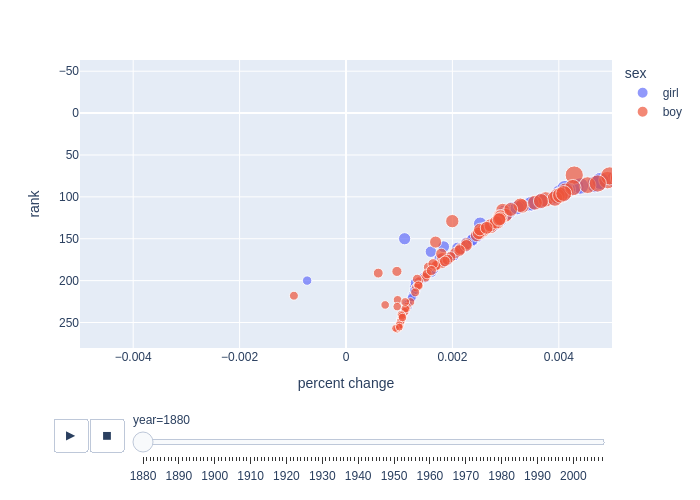

In [22]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])

# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')

bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed

fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Q9

Somewhat